# Trabajo Final (CRP): Estrategia de Retención de Clientes


Base de datos de [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). 

Procedemos a importar las librerías a utilizar y llamamos la base de datos:

In [1]:
## librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura base de datos
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Exploración de la base de datos

A continuación análizamos las características de nuestra base de datos buscando describir cómo se relaciona cada columna con la columna objetivo e identificar qué tan relevante puede ser cada características en los posteriores procesos de clusterización y clasificación. 

In [2]:
## Tamaño de la base de datos
print("La base de datos contiene {} registros y {} columnas.".format(data.shape[0], data.shape[1]))

## Primeros 5 regustros
data.head()

La base de datos contiene 7043 registros y 21 columnas.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Las columnas de la base de datos seleccionada contiene atributos del siguiente tipo:

In [3]:
## tipo de objeto de c/característica:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Donde podemos observar que las columnas *SeniorCitizen*, *Tenure* y *MonthlyCharges* son de tipo numérico (int, float), mientras que las demás son de tipo 'object'. El tipo de la columa *TotalCharges* debería ser 'float', sin embargo está siendo leído como 'object'; más adelante en este notebook haremos las correcciones necesarias.

Por otro lado, la tabla anterios nos muestra que no existen valores nulos en ninguna de las columnas de la base de datos, puesto que el conteo de no nulos (non-null) es igual a la cantidad de registros.

La columna *CustomerID* es de tipo alfa-numerica y presenta un valor único para los 7043 registros de la base de datos, además de que no es relevante para el proceso de clasificación, por lo que podemos ignorar esta característica. 

#### Churn distribution

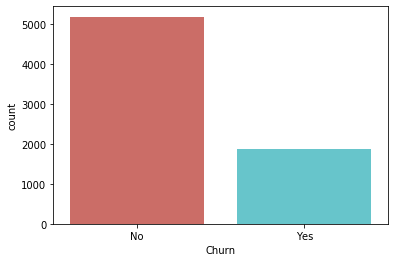

In [4]:
## Distribución de los datos en la columna de salida
sns.countplot(x='Churn', data=data, palette='hls')

In [5]:
## Porcentaje de Usuarios que abandonan y no abandonan el servicio
(data['Churn'].value_counts())/(data.shape[0])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

De la gráfica anterior tenemos que, de la base de datos utilizada, alrededor de 27% de los Usuarios abandonaron el servicio durante el último mes, mientras que el resto permanecieron. 

#### Gender distribution

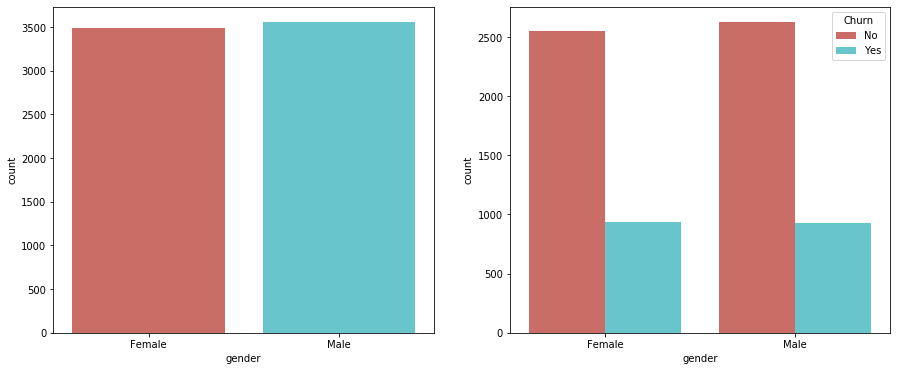

In [6]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna de género
sns.countplot(x='gender', data=data, palette='hls', ax=axes1)

## Distribución de los datos en la columna de género
sns.countplot(x='gender', data=data, hue='Churn', palette='hls', ax=axes2)

La cantidad de Usuarios pertenecientes a cada género es similar en nuestra base de datos.

In [7]:
(data.groupby('Churn')['gender'].value_counts())

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

Vemos que el género no influye a la hora de predecir tendencias, ya que el porcentaje de Usuarios que permanecen y abandonan el servicio es similar para cada género, por lo que podemos descartar esta columna. 

#### SeniorCitizen Distribution

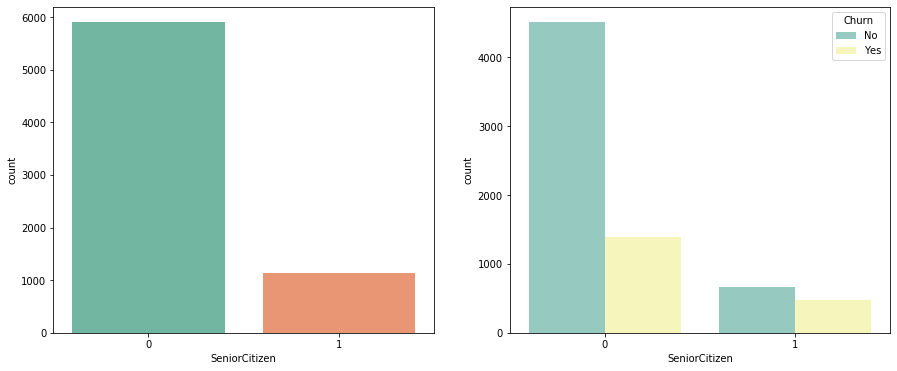

In [8]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna SeniorCitizen
sns.countplot(x='SeniorCitizen', data=data, palette='Set2', ax=axes1)

## Porcentaje de abandono entre Usuarios Senior y NonSenior
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='Set3', ax=axes2)

In [9]:
## Conteo de datos agrupados por el abandono
data.groupby('Churn')['SeniorCitizen'].value_counts()

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64

Más del 80% de los Usuarios presentes en la base de datos son **NonSeniorCitizens**; entre estos, alrededor del 24% abandonaron el servicio durante el último mes. Mientras que un cerca de un 42% de los **SeniorCitizen** cancelaron el servicio (casi el doble de los **NonSenior**). 

#### Partner Distribution

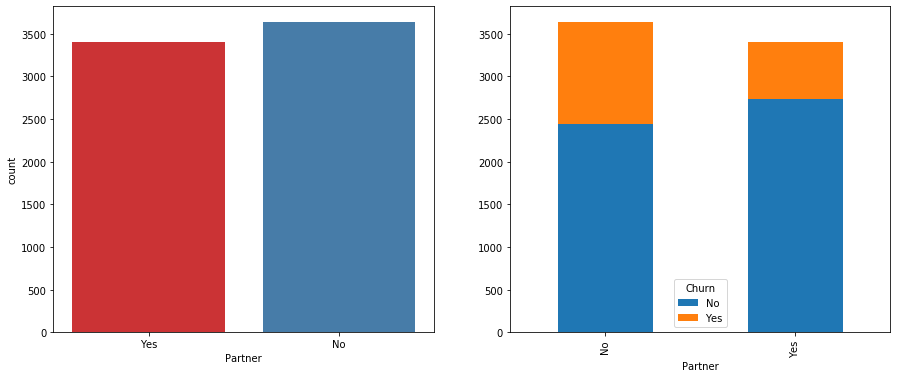

In [10]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Partner
sns.countplot(x='Partner', data=data, palette='Set1', ax=axes1)

## Porcentaje de abandono entre Usuarios con Partnet y los que no tienen
partner_cross = pd.crosstab(data['Partner'], data['Churn'])
partner_cross.plot(kind='bar', stacked=True, ax=axes2)

In [11]:
data.groupby('Churn')['Partner'].value_counts()

Churn  Partner
No     Yes        2733
       No         2441
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64

Entre los Usuarios que aún continúan con el servicio, alrededor de la mitad viven con un compañero. Mientras que casi el doble de los Usuarios que abandonaron el servicio durante el último mes viven solos. 

#### Dependents Distribution

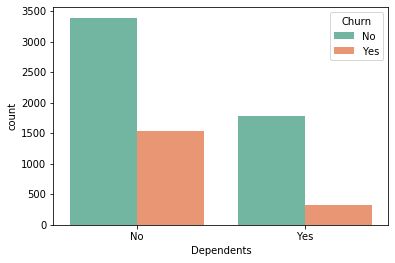

In [12]:
## Distribución de los datos en la columna Dependents
sns.countplot(x='Dependents', hue='Churn', data=data, palette='Set2')

In [13]:
data.groupby('Churn')['Dependents'].value_counts()

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64

31% de los Usuario que no tienen dependientes abandonaron el servicio durante el último mes, mientras que solo el 15% de los Usuarios que tienen dependientes abandonaron el servicio (50% menos).

#### Contract Distribution

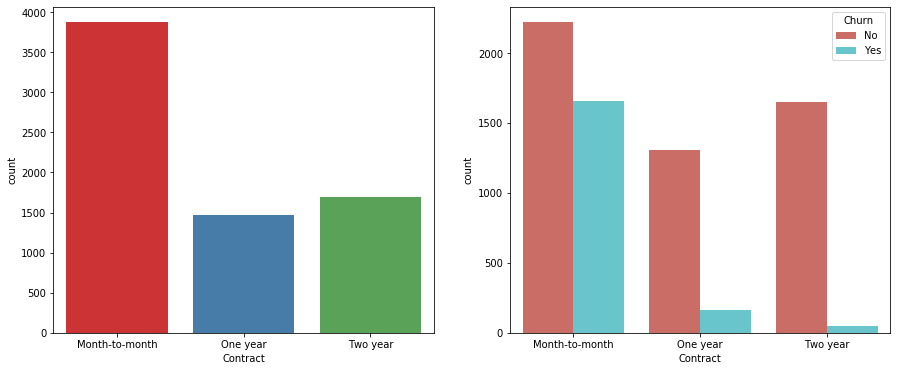

In [14]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='Contract', data=data, palette='Set1', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=data, palette='hls', ax=axes2)

In [15]:
data.groupby('Churn')['Contract'].value_counts()

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64

Más de la mitad (55%) de los Usuarios presentes en la base de datos, contaban con un tipo de contrato "mes a mes". Además, alrededor de un 89% de los Usuarios que abanaron el servicio durante el último mes tenían un tipo de contrato "mes a mes", 9% un contrato a un año y 2% un contrato a dos años.


#### Payment Method Distribution

[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

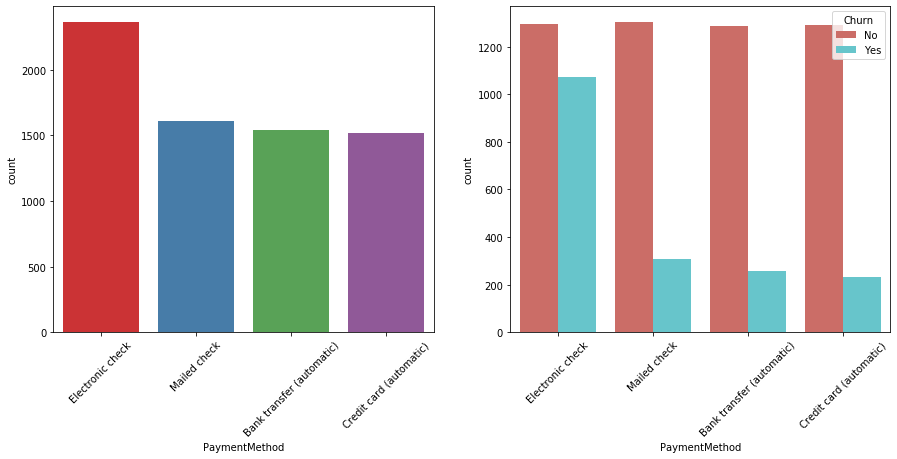

In [16]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Payment Method
chart = sns.countplot(x='PaymentMethod', data=data, palette='Set1', ax=axes1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

## Comportamiento del abandono entre los Usuarios dependiendo del método de pago
chart = sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='hls', ax=axes2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [17]:
data.groupby('Churn')['PaymentMethod'].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

La cantidad de Usuarios con método de pago *Electronick Check* es ligeramente mayor que los Usuarios con otros métodos de pago. El abandono entre Usuarios con dicho método fue mucho mayor a los otros. 

#### Tenure distribution

Histograma de la antiguedad de lso Usuarios suscritos al servicio. 

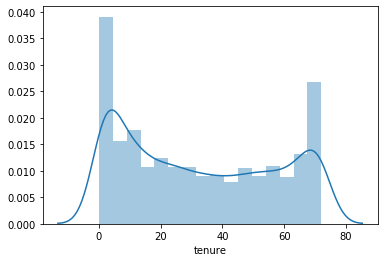

In [18]:
sns.distplot(data.tenure)

Para una mejor visualización, vamos a separar a los Usuarios de acuerdo a la antiguedad en aquellos con menos un año, al menos dos años, tres años, etc. Grafiquemos la antiguedad de los Usuarios y comparemos con el abandono durate el último mes. 

Text(0, 0.5, 'Número Usuarios')

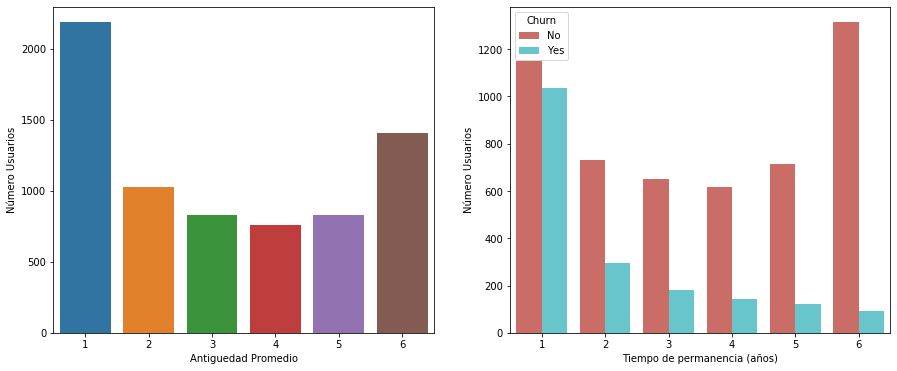

In [19]:
# Agrupamos los datos en la columna Tenure
bins = [-1, 12, 24, 36, 48, 60, 73]
labels = ['1', '2', '3', '4', '5', '6']
data['tenureGroup'] = pd.cut(data["tenure"], bins, labels=labels)

# Antiguedad usuarios
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='tenureGroup', data=data, ax=axes1)
axes1.set_xlabel('Antiguedad Promedio')
axes1.set_ylabel('Número Usuarios')


# Abandono durante el último mes
sns.countplot(x='tenureGroup', hue='Churn', data=data, palette='hls', ax=axes2)
axes2.set_xlabel('Tiempo de permanencia (años)')
axes2.set_ylabel('Número Usuarios')

La mayoría de los Usuarios de la base de datos tienen un año o menos con el servicio, seguidos de los Usuarios con más de 5 años. A medida que aumenta el número de años de suscripción los Usuarios, menor es la tasa de abandono de los mismos.

#### Phone service Distribution

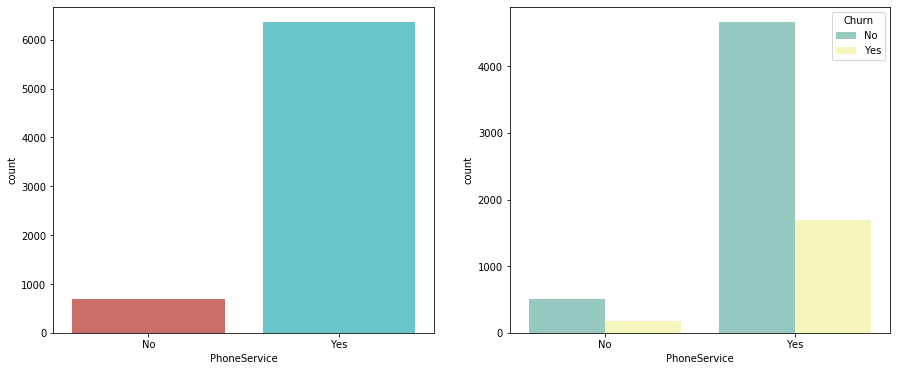

In [20]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='PhoneService', data=data, palette='hls', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='PhoneService', hue='Churn', data=data, palette='Set3', ax=axes2)

In [21]:
data.groupby('Churn')['PhoneService'].value_counts()

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: PhoneService, dtype: int64

Un 90% de los Usuarios contaba con servicio telefónico. El 27% de dichos Usuarios abandonaron durante el último mes. Mientras que de los Usuarios que no contaban con el servicio, un 25% abandonó. Se mantiene la mista tendencia/tasa de abandono en ambos casos.

#### MultipleLines Distribution

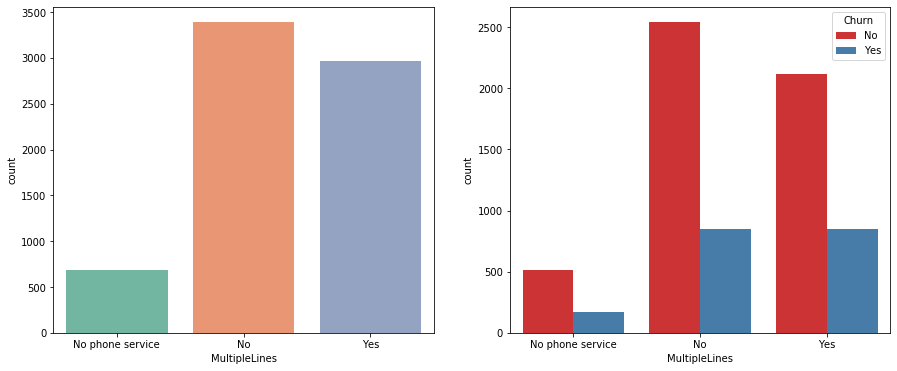

In [22]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='MultipleLines', data=data, palette='Set2', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='MultipleLines', hue='Churn', data=data, palette='Set1', ax=axes2)

In [23]:
data.groupby('Churn')['MultipleLines'].value_counts()

Churn  MultipleLines   
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: MultipleLines, dtype: int64

Entre los Usuarios que cuentan con servicio telefónico, es ligeramente mayor la cantidad de Usuarios con Múltiples Líneas y la tendencia al abandono en ambos caso es similar (+/- 25% )

#### InternetService Distribution

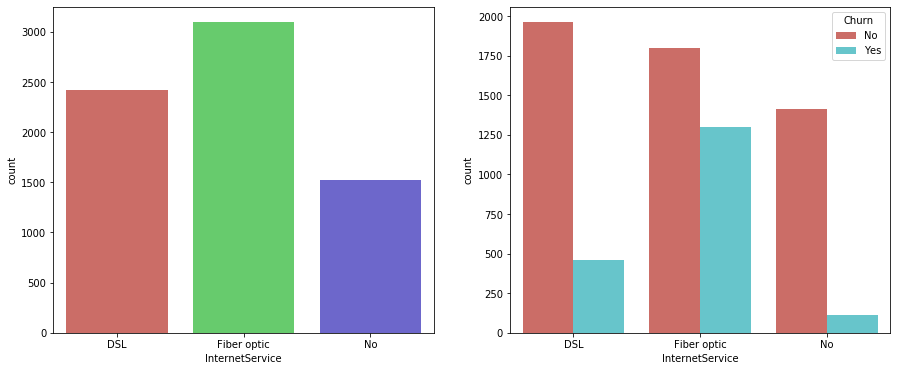

In [24]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='InternetService', data=data, palette='hls', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='InternetService', hue='Churn', data=data, palette='hls', ax=axes2)

In [25]:
data.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

88% de los Usuario de la base de datos contaban con servicio de internet; entre estos, 56% utiliza *fibra óptica* y 44% utiliza *DSL*. La tendencia del abandono es mucho más alta en los usuarios que utilizaban *fibra óptica* con un 42% de los Usuarios de esta categoría (69% del total de los Usuarios que abandonaron el servicio).19% de los Usuarios que utilizaban DSL (25% del total de Usuarios que abandonaron el servicio), abandonó el servicio. Mientras que solo el 7% de los Usuarios que no contaban con servicio de Internet abandonó el servicio (6% del del total de Usuarios que abandonaron el servicio).

#### OnlineSecurity Distribution

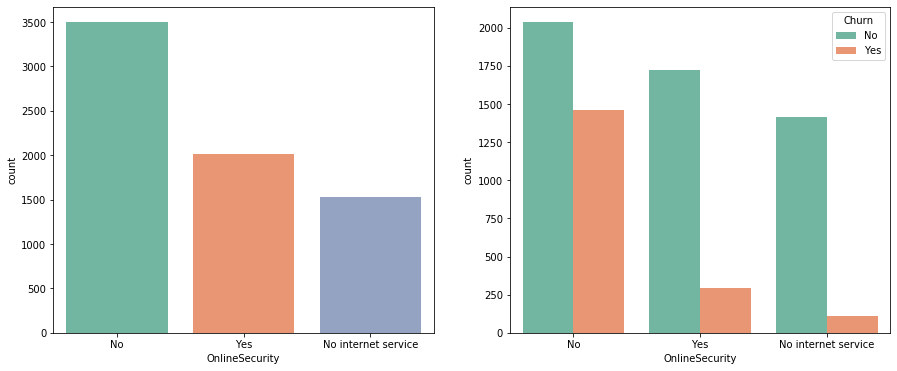

In [26]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='OnlineSecurity', data=data, palette='Set2', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='OnlineSecurity', hue='Churn', data=data, palette='Set2', ax=axes2)

In [27]:
data.groupby('Churn')['OnlineSecurity'].value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

42% de los Usuarios que no contaban con servicio de OnlineSecirity abandonaron el servicio (78% del total de Usuarios que abandonaron el servicio). Mientras que solo un 15% de los Usuarios con OnlineSecurity abandonó el servicio (16% de los Usuarios que abandonaron el servicio en el último mes).

#### OnlineBackup distribution

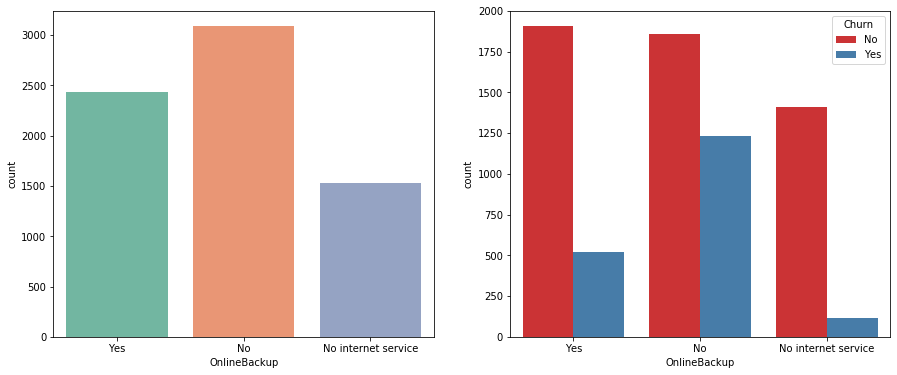

In [28]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='OnlineBackup', data=data, palette='Set2', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='OnlineBackup', hue='Churn', data=data, palette='Set1', ax=axes2)

In [29]:
data.groupby('Churn')['OnlineBackup'].value_counts()

Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: OnlineBackup, dtype: int64

De los Usuarios que abandonaron el servicio, 66% no contaban con *OnlineBackup* (40% de los Usuarios de esta categoría), mientras que el 28% sí contaba con el servicio (22% de los Usuarios de esta categoría). 

#### Monthly Charges Distribution

Ahora creamos una nueva columna (*ChurnBin*) en la cual asignaremos el valor de 0 si el Usuario permanece con el servicio y 1 si el Usuario abandonó el servicio en el último mes. Además, agrupamos la columna de *CargosMensuales* en 10 grupos para una mejor visualización.

Text(0.5, 1.0, 'Tasa de abandono vs Cargos Mensuales')

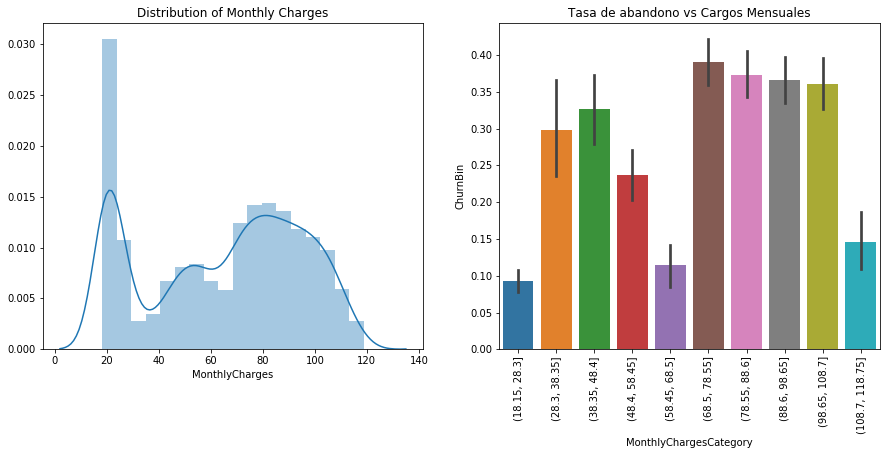

In [30]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Creamos columna ChurnBin
churn_mapping = {"No": 0, "Yes": 1}
data['ChurnBin'] = data['Churn'].map(churn_mapping)

# Histograma cargos mensuales a Usuarios
sns.distplot(data.MonthlyCharges, ax=axes1)
axes1.set_title('Distribution of Monthly Charges')

# Categorizamos la variable entre 10 bins 
data['MonthlyChargesCategory'] = pd.cut(data["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='ChurnBin', data=data, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Tasa de abandono vs Cargos Mensuales')


In [31]:
data.groupby('Churn')['MonthlyChargesCategory'].value_counts()

Churn  MonthlyChargesCategory
No     (18.15, 28.3]             1458
       (78.55, 88.6]              598
       (88.6, 98.65]              553
       (68.5, 78.55]              544
       (48.4, 58.45]              488
       (98.65, 108.7]             482
       (58.45, 68.5]              420
       (108.7, 118.75]            251
       (38.35, 48.4]              246
       (28.3, 38.35]              134
Yes    (78.55, 88.6]              355
       (68.5, 78.55]              349
       (88.6, 98.65]              320
       (98.65, 108.7]             272
       (48.4, 58.45]              152
       (18.15, 28.3]              148
       (38.35, 48.4]              119
       (28.3, 38.35]               57
       (58.45, 68.5]               54
       (108.7, 118.75]             43
Name: MonthlyChargesCategory, dtype: int64

Un gran número de Usuarios tienen cargos mensuales relativamente bajos (USD 18.15 - 28.3); entre estos la tasa de abandono (9%) es baja en comparación con la tasa de abandono de los Usuarios con cargos mensuales más altos (37% en promedio para Usuarios con cargos mensuales entre USD 78.55 y USD 108.7). La tasa de abandono para los Usuarios con los cargos mensuales más altos (>108.7) fue de solo 15%.

#### Total Charges Distribution

Para esta columna se mencionó que está siendo leída como tipo '*object*', cuando debería ser de tipo flotante. Esto se debe a que existen filas donde los cargos totales se almacenaron como " ". Para lidiar con ello, se llenaron dichas filas asumiendo que los cargos totales resultan del producto entre el *tiempo de permanencia* (**Tenure**) y los *cargos mensuales* (**MonthlyCharges**).

In [32]:
## Reemplazando strings con la fórmula descrita
data['TotalCharges'] = data['TotalCharges'].replace(" ", (data.MonthlyCharges * data.tenure))


## Convertimos la columna a tipo numérico
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

Miremos los tipos de datos de nuestra base nuevamente.

In [33]:
data.dtypes

customerID                  object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Churn                       object
tenureGroup               category
ChurnBin                     int64
MonthlyChargesCategory    category
dtype: object

Ahora hacemos un histograma y una dsitribución, dividiendo los Cargos Totales en 10 categorías. 

Text(0.5, 1.0, 'Abandono vs Cargos Totales')

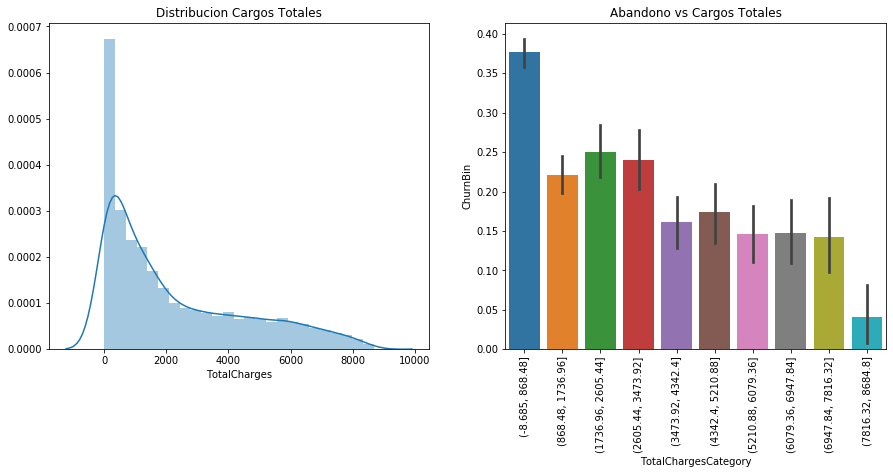

In [34]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Histograma 
sns.distplot(data.TotalCharges, ax=axes1)
axes1.set_title('Distribucion Cargos Totales')

# Distribución Categorizada
data['TotalChargesCategory'] = pd.cut(data["TotalCharges"], bins=10)
sns.barplot(x='TotalChargesCategory', y='ChurnBin', data=data, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Abandono vs Cargos Totales')

De acuerdo con la gráfica, los Usuarios con cargos totales más bajos, presentaron una mayor tasa de abandono durante el último mes. 

#### Correlaciones

Grafiquemos las correlación entre las variables contínuas:

In [35]:
# correlación
data_corr = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
data_corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


(3, 0)

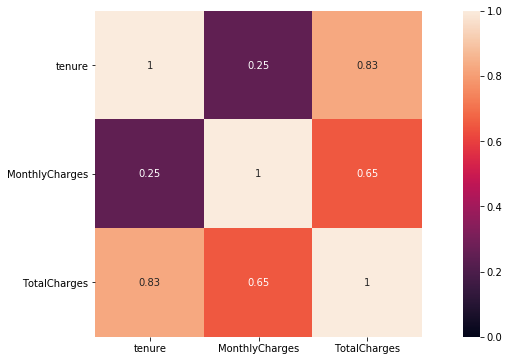

In [36]:
#Mapa de calor

fig, axes = plt.subplots(figsize=(15,6))
sns.heatmap(data=data_corr, annot=True, ax=axes, square=True, linewidths=0, vmin=0, vmax=1)
#[items.set_rotation(90) for items in axes.get_xticklabels()]
[items.set_rotation(0) for items in axes.get_yticklabels()]
axes.set_ylim([3, 0])

Como ya se mencionó, los *Cargos Totales* son resultan del producto entre el *tiempo de permanencia* de los Usuarios y los *cargos mensuales*, por lo que la correlación entre dicha variable con las otras dos arroja valores de 83% y 65%, respectivamente. Para el proceso de clusterización y posterior clasificación de los Usuarios se eliminará esta variable de la base de datos.

### Transformación de la base de datos

Procedemos a eliminar de nuestra base de datos aquellas columnas que se encontraron no ser muy representativas para el proceso de clasificación. 

In [37]:
## observamos la base actual
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,ChurnBin,MonthlyChargesCategory,TotalChargesCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,"(28.3, 38.35]","(-8.685, 868.48]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,3,0,"(48.4, 58.45]","(1736.96, 2605.44]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,"(48.4, 58.45]","(-8.685, 868.48]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,0,"(38.35, 48.4]","(1736.96, 2605.44]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,"(68.5, 78.55]","(-8.685, 868.48]"


In [38]:
# Eliminamos las columnas 'customerID', 'gender', 'TotalCharges', 'TotalChargesCategory'
data = data.drop(['customerID', 'gender', 'TotalCharges', 'TotalChargesCategory'], axis=1)

In [39]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'Churn', 'tenureGroup', 'ChurnBin', 'MonthlyChargesCategory'],
      dtype='object')

Miremos el tipo de cada variable contenida en nuestra base de datos:

In [40]:
# tipo de datos
data.dtypes

SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
Churn                       object
tenureGroup               category
ChurnBin                     int64
MonthlyChargesCategory    category
dtype: object

Además, convertimos todas las variables tipo 'object' a variables numéricas, ya que los modelos de Machine Learning trabajan mejor con números.

In [41]:
## Tomamos el vector de columnas

cat_columns = data.select_dtypes(['object', 'category']).columns
print(cat_columns)

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenureGroup',
       'MonthlyChargesCategory'],
      dtype='object')


Creamos la base de datos **data_cat** en la cual convertimos todad las variables tipo '*object*' de la base **data** a variables tipo '*category*'.

In [42]:
## Convertimos variables 'object' a categóricas

data_cat = data.astype({'Partner':'category', 'Dependents':'category', 'PhoneService':'category', 'MultipleLines':'category',
       'InternetService':'category', 'OnlineSecurity':'category', 'OnlineBackup':'category', 'DeviceProtection':'category',
       'TechSupport':'category', 'StreamingTV':'category', 'StreamingMovies':'category', 'Contract':'category',
       'PaperlessBilling':'category', 'PaymentMethod':'category', 'Churn':'category'})

In [43]:
## Miramos el tipo de las variables
data_cat.dtypes

SeniorCitizen                int64
Partner                   category
Dependents                category
tenure                       int64
PhoneService              category
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup              category
DeviceProtection          category
TechSupport               category
StreamingTV               category
StreamingMovies           category
Contract                  category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
Churn                     category
tenureGroup               category
ChurnBin                     int64
MonthlyChargesCategory    category
dtype: object

In [44]:
## observamos la base actual
data_cat.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenureGroup,ChurnBin,MonthlyChargesCategory
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0,"(28.3, 38.35]"
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,No,3,0,"(48.4, 58.45]"
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1,1,"(48.4, 58.45]"
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,No,4,0,"(38.35, 48.4]"
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1,1,"(68.5, 78.55]"


Aplicamos la función "**cat.codes**" sobre las columnas de clase "*category*" en nuestra base de datos para asignar un valor numérico a los a cada registro, de acuerdo al atributo que tome.

In [45]:
## Convertimos variables categóricas a numéricas

data_cat[cat_columns]= data_cat[cat_columns].apply(lambda x: x.cat.codes)

In [46]:
## Observamos la base de datos convertida

data_cat.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenureGroup,ChurnBin,MonthlyChargesCategory
0,0,1,0,1,0,1,0,0,2,0,...,0,0,0,1,2,29.85,0,0,0,1
1,0,0,0,34,1,0,0,2,0,2,...,0,0,1,0,3,56.95,0,2,0,3
2,0,0,0,2,1,0,0,2,2,0,...,0,0,0,1,3,53.85,1,0,1,3
3,0,0,0,45,0,1,0,2,0,2,...,0,0,1,0,0,42.30,0,3,0,2
4,0,0,0,2,1,0,1,0,0,0,...,0,0,0,1,2,70.70,1,0,1,5
5,0,0,0,8,1,2,1,0,0,2,...,2,2,0,1,2,99.65,1,0,1,8
6,0,0,1,22,1,2,1,0,2,0,...,2,0,0,1,1,89.10,0,1,0,7
7,0,0,0,10,0,1,0,2,0,0,...,0,0,0,0,3,29.75,0,0,0,1
8,0,1,0,28,1,2,1,0,0,2,...,2,2,0,1,2,104.80,1,2,1,8
9,0,0,1,62,1,0,0,2,2,0,...,0,0,1,0,0,56.15,0,5,0,3


En la base de datos '*data_cat*' se transformaron también las columnas tenureGroup y MonthlyChargesCategory, creadas anteriormente. En este caso, los valores de la columna tenureGroup se les asignó un número  del 0 al 5, de acuerdo al tiempo de permanencia así:

- Menos de un año = 0
- Entre 1 y 2 años = 1
- Entre 2 y 3 años = 2
- Entre 3 y 4 añoss = 3
- Entre 4 y 5 años = 4
- Entre 5 y 6 años = 5

Para los Cargos mensuales, se asignó un número así:

- Entre USD 18.15 - 28.3 = 0
- Entre USD 28.3 - 38.35 = 1
- Entre USD 38.35 - 48.4 = 2
- Entre USD 48.4 - 58.45 = 3
- Entre USD 58.45 - 68.5 = 4
- Entre USD 68.5 - 78.55 = 5
- Entre USD 78.55 - 88.6 = 6
- Entre USD 88.6 - 98.65 = 7
- Entre USD 98.65 - 108.7 = 8
- Entre USD 108.7 - 118.75 = 9

Teniendo en cuenta lo anterios, procedemos a eliminar de nuestra base de datos las columnas '*Tenure*' y '*MonthlyCharges*', además, ya no necesitamos la columna '*ChurnBin*'.

In [47]:
data_cat = data_cat.drop(['tenure', 'MonthlyCharges', 'ChurnBin'], axis=1)
data_cat.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenureGroup,MonthlyChargesCategory
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2,3
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,3
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,2
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,5


### Variables de mayor relevancia

A conttinuación, aplicamos un proceso de selección manual de características para determinar la importancia de cada una de las variables de nuestra base de datos (**data_cat**) para predecir el abandono de los Usuarios. En este caso hemos decidido utilizar los modelos de Regresión Logística y Bosque Aleatorio para el proceso de clasificación:


Separamos la columna objetuvo '*Churn*' de la base de datos.

In [48]:
data_feat = data_cat.drop(['Churn'], axis=1)
target = data_cat.loc[:, ['Churn']]

A continuación, procedemos a dividir la base de datos en un 80% para el entrenamiento y 20% de prueba

In [49]:
## Importamos las librerías
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Dividimos la base de datos
X_train, X_test, y_train, y_test = train_test_split(data_feat, target, test_size=0.2, random_state=0)

Utilizamos una instancia StandarScaler() para estandarizar los datos de entrenamiento y definimos el modelo de Regresión Logística como **lr** y el de Bosque Aleatorio como **rf**. 

In [50]:
scaler = StandardScaler()
lr = LogisticRegression()
rf = RandomForestClassifier()

Ajustamos el escalador a los datos de entranamiento:

In [51]:
# Ajustamos escalador
X_train_std = scaler.fit_transform(X_train)

Ahora ajustamos ambos modelos a los datos de entrenamiento escalados:

In [52]:
# Ajustamos modelo de Regresión Logística
lr.fit(X_train_std, y_train)

# Ajustamos modelo de Bosque Aleatorio
rf.fit(X_train_std, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Escalamos las características del conjunto de prueba. 

In [53]:
# Escalamos conjunto prueba
X_test_std = scaler.transform(X_test)

Predecimos el abandono de Usuarios utilizando cada modelo.

In [104]:
# Regresión Logística
lr_pred = lr.predict(X_test_std)
acc = accuracy_score(y_test, lr_pred)
print("{0:.1%} de precisión con Regresión Logística.".format(acc))

# Bosque Aleatorio
rf_pred = rf.predict(X_test_std)
acc = accuracy_score(y_test, rf_pred)
print("{0:.1%} de precisión con Bosque Aleatorio.".format(acc))

97.7% de precisión con Regresión Logística.
98.4% de precisión con Bosque Aleatorio.


Importancia de cada característica, de acuerdo con cada modelo:

In [55]:
# Regresión Logística
lr_imp = dict(zip(X_train.columns, abs(lr.coef_[0]).round(2)))
print("Importancia de acuerdo al modelo de Regresión logística: ")
print("{}\n".format(lr_imp))

# Bosque Aleatorio
rf_imp = dict(zip(X_train.columns, rf.feature_importances_.round(2)))
print("Importancia de acuerdo al modelo de Bosque Aleatorio: ")
print("{}\n".format(rf_imp))


Importancia de acuerdo al modelo de Regresión logística: 
{'SeniorCitizen': 0.09, 'Partner': 0.01, 'Dependents': 0.11, 'PhoneService': 0.25, 'MultipleLines': 0.11, 'InternetService': 0.17, 'OnlineSecurity': 0.23, 'OnlineBackup': 0.17, 'DeviceProtection': 0.07, 'TechSupport': 0.21, 'StreamingTV': 0.04, 'StreamingMovies': 0.02, 'Contract': 0.67, 'PaperlessBilling': 0.18, 'PaymentMethod': 0.1, 'tenureGroup': 0.73, 'MonthlyChargesCategory': 0.75}

Importancia de acuerdo al modelo de Bosque Aleatorio: 
{'SeniorCitizen': 0.04, 'Partner': 0.05, 'Dependents': 0.03, 'PhoneService': 0.01, 'MultipleLines': 0.04, 'InternetService': 0.02, 'OnlineSecurity': 0.06, 'OnlineBackup': 0.05, 'DeviceProtection': 0.04, 'TechSupport': 0.05, 'StreamingTV': 0.03, 'StreamingMovies': 0.03, 'Contract': 0.14, 'PaperlessBilling': 0.05, 'PaymentMethod': 0.11, 'tenureGroup': 0.16, 'MonthlyChargesCategory': 0.09}



Ahora seleccionamos las características de mayor importancia, según cada modelo. Para esto seleccionamos aquellas cuya importancia esté por encima de la media.

In [56]:
# Regresión logística

for key, value in lr_imp.items():
    if abs(value) > abs(lr.coef_[0]).mean():
        print(key, sep='')

PhoneService
OnlineSecurity
Contract
tenureGroup
MonthlyChargesCategory


In [57]:
# Bosque Aleatorio

for key, value in rf_imp.items():
    if value > abs(rf.feature_importances_).mean():
        print(key, sep='')

OnlineSecurity
Contract
PaymentMethod
tenureGroup
MonthlyChargesCategory


En este caso, podemos decidirnos por tomar aquellas características a las que ambos modelos arrojaron como las más importantes. Estas serían:
- Seguridad Online (OnlineSecurity)
- Tipo de contrato (Contract)
- Tiempo de permanencia (tenureGroup)
- Cargos Mensuales (MonthlyChargesCategory)
    

### K-Means

Para el objetivo del notebook, se aplicará el método de K-Means sobre la base de datos **data_cat** para agrupar a los Usuarios, luego se analizará el comportamiento de las variables en cada grupo, respecto al abandono. 

Determinamos el número 'óptimo' de clusters en los cuales deberíamos dividir la base datos a través del gráfico del codo, el cuál busca el porcentaje de varianza explicada como función del número de clusters. Al final se elige el punto en donde se considere que el añadir otro cluster no aporta mayor precisión al modelo. 

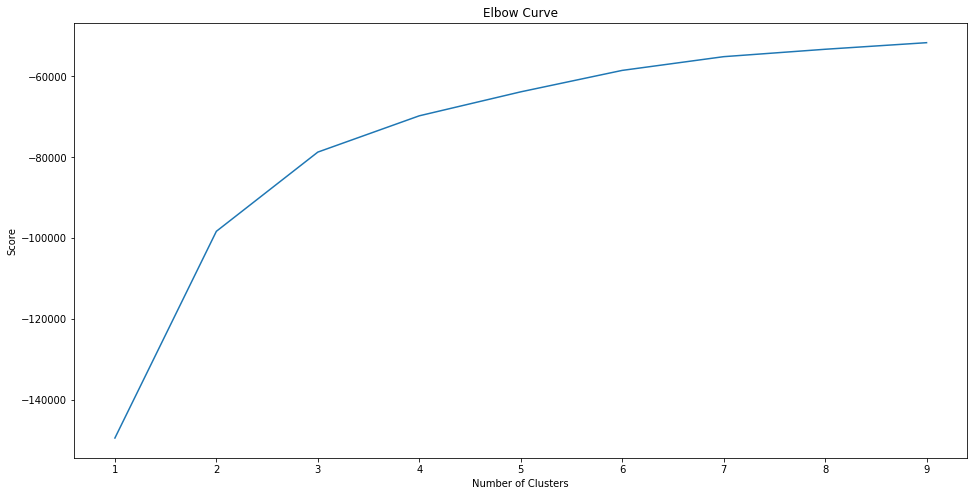

In [58]:
from sklearn.cluster import KMeans

## Buscamos el valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data_feat).score(data_feat) for i in range(len(kmeans))]
score

plt.figure(figsize=(16, 8))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Tomamos K = 4 y aplicamos K-Means sobre la base de datos:

In [59]:
# k=4

kmeans = KMeans(n_clusters=4).fit(data_feat)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.23824738 0.36193519 0.18804199 0.99452305 0.93382017 0.80648106
  0.40803286 0.56777727 0.58146965 0.42446372 0.86079416 0.87448654
  0.1232314  0.73938841 1.71519854 0.8297581  5.82199909]
 [0.07482993 0.63520408 0.44047619 0.78571429 0.80442177 1.13945578
  1.09353741 1.03571429 0.97619048 1.00170068 0.81802721 0.83333333
  1.46088435 0.39455782 1.22278912 3.95323129 1.25510204]
 [0.07306191 0.32013385 0.30340212 0.79754601 0.39765756 0.95482432
  0.74400446 0.72058003 0.67261573 0.72838818 0.61684328 0.61795873
  0.36029002 0.42108199 2.13831567 0.5103179  1.1344116 ]
 [0.21295805 0.68401487 0.3377589  0.97079129 1.55018587 0.70578864
  1.08868826 1.39670738 1.45618694 1.16834838 1.58576739 1.58576739
  1.18374934 0.70738184 1.0929368  4.22464153 7.13913967]]


En este caso tenemos muchas variables, por lo que no es viable realizar una gráfica. Sin embargo, se realizará el análisis de acuerdo con los resultados que se vayan obteniendo:

In [60]:
groups = kmeans.labels_
print(groups.shape)

(7043,)


In [61]:
## Convertimos a pandas

groups = pd.DataFrame(data=groups, columns=['labels'])
print(groups.shape)
groups.head()

(7043, 1)


,labels
0,2
1,2
2,2
3,1
4,0


Miremos si se pudieron generar valores nulos al asignar un grupo a cada registro de la base de datos. 

In [62]:
## valores nulos
groups.isna().sum()

labels    0
dtype: int64

Ahora creamos una base llamada **data2** en donde se procederá a agrupar los resultados obtendidos al aplicar K-Means con la base de datos original **data_cat**. 

In [63]:
## Base data2
data2 = data_cat

Agregamos columna con los grupos obtenidos a la base:

In [64]:
## Agregamos columna con grupos a los datos
data2['labels'] = groups.values
data2.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenureGroup,MonthlyChargesCategory,labels
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,2
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2,3,2
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,3,2
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,2,1
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,5,0


Observamos el número de Usuarios asignados a cada grupo.

In [65]:
data2['labels'].value_counts()

0    2191
3    1883
2    1793
1    1176
Name: labels, dtype: int64

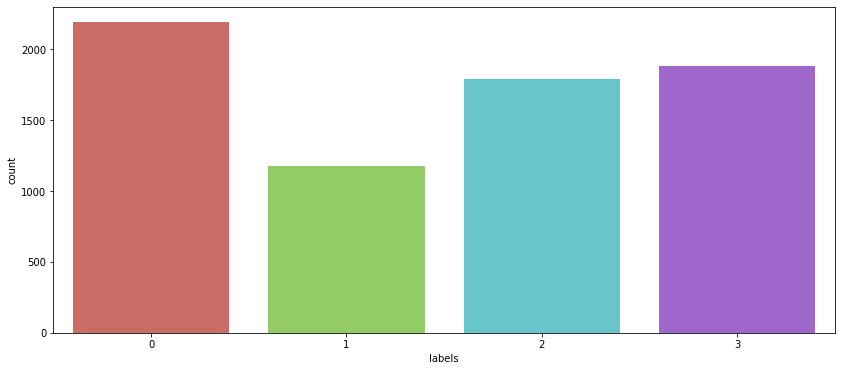

In [89]:
## Distribución de los datos en la columna de salida
plt.figure(figsize=(14,6))
sns.countplot(x='labels', data=data2, palette='hls')

**31%** de los Usuarios fueron asignados al **grupo 0**, **27%** se agruparon en el **grupo 3**, **26%** quedaron dentro del **grupo 2** y **16** fueron asignados al **grupo 1**.

Para cada grupo, el comportamiento de la tasa de abandono es el siguiente:

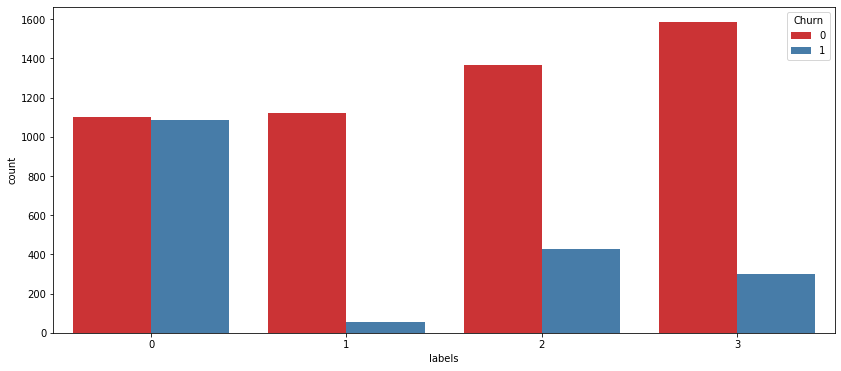

In [78]:
## Comportamiento del abandono entre los Usuarios dependiendo del grupo
plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='Churn', data=data2, palette='Set1')

In [68]:
## Comportamiento del abandono entre los Usuarios dependiendo del grupo
data2.groupby('Churn')['labels'].value_counts()

Churn  labels
0      3         1585
       2         1365
       1         1121
       0         1103
1      0         1088
       2          428
       3          298
       1           55
Name: labels, dtype: int64

Observaciones:
- La mitad de los Usuarios del **grupo 0** (1088), alrededor del 15% del total de Usuarios en la base, abandonaron el servicio durante el último mes. 
- Del total de Usuarios que abandonaron el servicio, **58%** pertenecen al **grupo 0**, **23%** pertenecen al **grupo 2**, **16%** al **grupo 3** y solo un **3%** pertenecen al **grupo 1**.
- **24%** de los Usuarios del **grupo 2** abandonaron el servicio. 
- Del total de Usuarios del **grupo 3**, **16%** abandonaron el servicio. 
- Solo el **5%** de los Usuarios pertenecientes al **grupo 1** abandonaron el servicio en el último mes.
    

Miremos ahora cómo se comporta cada grupo respecto a las características que definimos como de mayor importancia anteriormente:
    

#### Tipo de contrato

A continuación procedemos a graficar la distribución del tipo de contrato de lo Usuarios pertenecientes a cada grupo, donde:
- 0 = Contrato mes a mes
- 1 = Contrato a un año
- 2 = Contrato a dos años

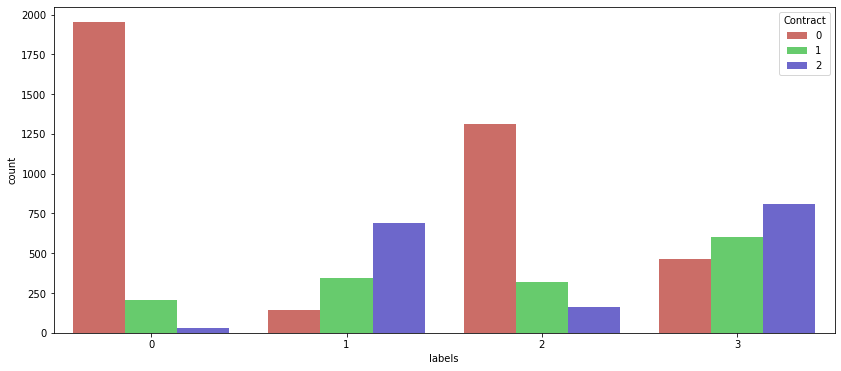

In [69]:
## Distribución de tipo de contrato en cada grupo

plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='Contract', data=data2, palette='hls')

Observaciones:
- Para los grupos 0 y 2, el tipo de contrato predominante es *mes a mes*, seguido del contrato a *un año*, y por último el contrato a *dos años*. 
- Para estos dos grupos se obtuvo la mayor tasa de abandono durante el último mes.
- Los grupos 1 y 3 presentaron tasas de abandono de Usuario más bajas. En este par de grupos, fue mayor el número de Usuarios con un tipo de contrato a *dos años*, seguido del contrato a *un año* y el contrato *mes a mes*.
- La probabilidad de abandono de los Usuarios aumenta para aquellos grupos donde el tipo de contrato *mes a mes* es el predominante. Esto es coherente con lo observado en el análisis exploratorio.
    

##### Tiempo de Permanencia:

El significado de cada número (0-5) en esta variable se defininó anteriormente:

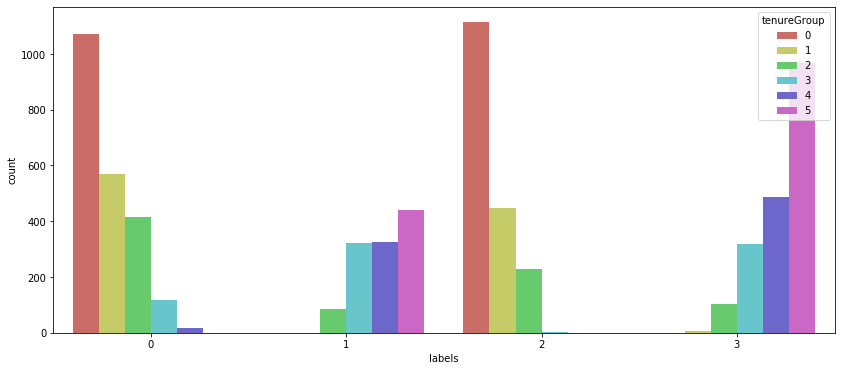

In [71]:
## Distribución de tiempo de permanencia en cada grupo
plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='tenureGroup', data=data2, palette='hls')

Observaciones:
- En los grupos 0 y 2 el mayor número de Usuarios se concentró en aquellos con menos de un año con el servicio, seguido de los Usuarios entre uno y dos años, y así hasta los Usuarios con más de 5 años, que representan la menor proporción en ambos grupos.
- El comportamiento de los grupos 1 y 3 es contario al de los dos anteriores, ya que el número de Usuarios suscritos pertenecientes a cada grupo fue en aumento con el tiempo de permanencia de los mismos.

#### Cargos Mensuales

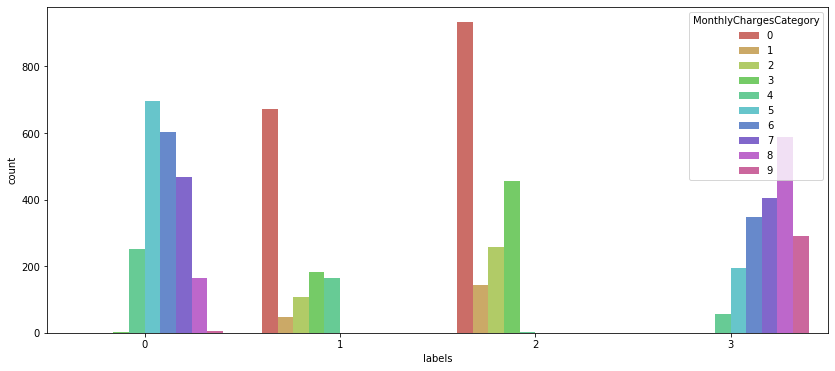

In [73]:
## Distribución de Cargos Mensuales en cada grupo
plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='MonthlyChargesCategory', data=data2, palette='hls')

Observaciones:
- Los cruatro grupos presentan un comportamiento más heterogéneo, respecto a esta variable, donde en el **grupo 0** el número de usuarios con cargos mensuales entre USD 68.5 y 78.55 (5) es mayor, en los **grupos 1 y 2**, el número de usuarios con cargos mensuales entre USD 18.15 y 23.3 (0) fue mayor, seguido de aquellos con cargos entre USD 48.4 - 58.45, USD 38.35 - 48.4 y USD 28.3 - 38.35. Mientras que en el **grupo 3** el número de Usuarios con cargos mensuales entre USD 98.65 - 108.7 fue el predominante. 

#### Seguridad Online

En este caso, las categorías se representan así:
- 0: No tiene seguridad online
- 1: Tiene seguridad online
- 2: No cuenta con servicio de internet

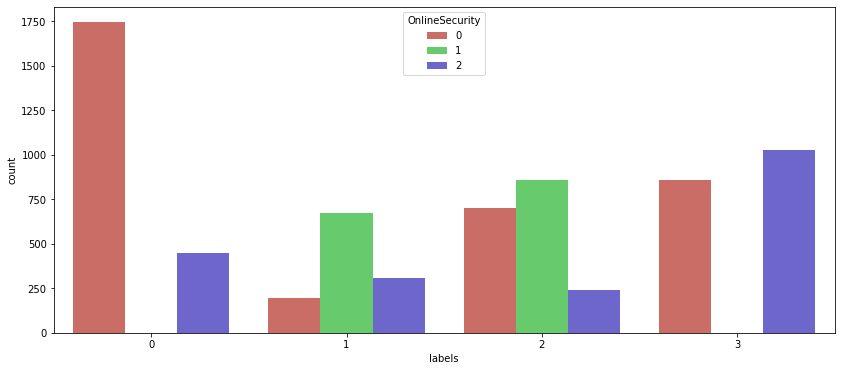

In [80]:
## Distribución de Seguridad Online en cada grupo
plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='OnlineSecurity', data=data2, palette='hls')

Observaciones:
- En este caso, en los grupos 1 y 2 es mayor el número de Usuarios que cuentan con seguridad online.
- En el grupo 0 es predominante el número de Usuarios que no cuentan con seguridad online
- Mientras en el grupo 3 es mayor el número de Usuarios que no cuentan son servicio de internet
- En estos dos últimos grupos fue nulo el número de Usuarios con seguridad online

Con respecto a lo observado anteriormente, podríamos concluir que los grupos 0 y 2 se podrían agrupar en uno solo, debido a su comportamiento similar y que lo mismo podría hacerse con los grupos 1 y 3. Sin embargo, antes probaremos graficando otras características con el objetivo de comprobar esta conclusión.

Grafiquemos el compotamiento del Método de Pago:

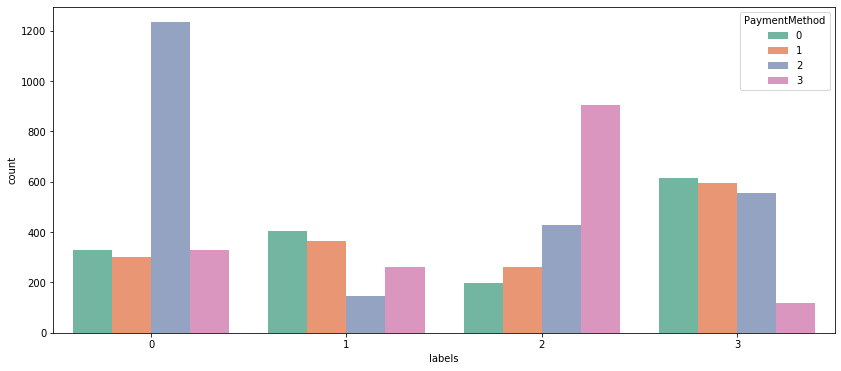

In [88]:
## Distribución de Método de Pago en cada grupo
plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='PaymentMethod', data=data2, palette='Set2')

Miremos ahora el servicio telefónico:

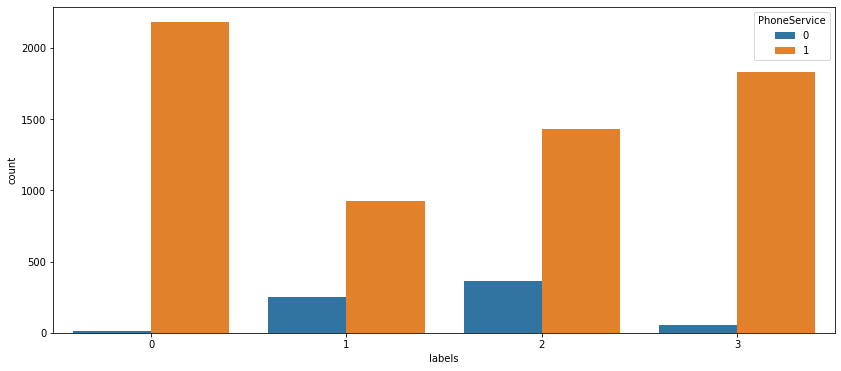

In [86]:
## Distribución de Método de Pago en cada grupo
plt.figure(figsize=(14,6))
sns.countplot(x='labels', hue='PhoneService', data=data2)

Observaciones:
- Respecto al *método de pago*,  la distribución de los Usuarios fue distinta para los cuatro grupos. Mientras que en todos los casos fue mayor el número de usuarios que contaban con servicio telefónico.
- Dado lo anterior, nos decidimos a continuar trabajando el ejercicio con los cuatro grupos resultantes del proceso de segmentación.

### Clasificación

Anteriormente empleamos los modelos de Regresión Logística y Bosque Aleatorio para calcular las características de mayor importancia en la base de datos, respecto al abandono de Usuarios.  Ahora utilizaremos y ajustaremos los mismos modelos para para realizar un proceso de clasificación de Usuarios dentro de los cuatro grupos que hemos identificado. 

- Primero de dividirá la base de datos (data2) en un 80% para el entrenamiento y 20% para prueba. 
- Luego se correrán los modelos sin modificar y se calcularán las métricas de *precision*, *recall* y *confusion matrix*, para identificar su rendimiento a la hora de clasificar a los Usuarios. 
- En caso de requerirlo, se ajustarán ambos modelos para mejorar su desempeño.

Importamos las librerías requeridas:

In [96]:
## métricas
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

Separamos la columna con los grupos del conjunto de características, además de que eliminamos la columna Churn y particionaremos la base de datos:

In [91]:
# Separamos el target y las características
data_feat2 = data2.drop(['Churn', 'labels'], axis=1)
target2 = data2.loc[:, ['labels']]

## Dividimos la base de datos
X_train, X_test, y_train, y_test = train_test_split(data_feat2, target2, test_size=0.2, random_state=0)

Ahora procedemos a escalar los datos de entrenamiento y prueba utilizando StandarScaler()

In [92]:
# Ajustamos escalador
X_train_std = scaler.fit_transform(X_train)

# Escalamos conjunto prueba
X_test_std = scaler.transform(X_test)

Entrenamos ambos modelos con los datos de entrenamiento:

In [93]:
# Ajustamos modelo de Regresión Logística
lr.fit(X_train_std, y_train)

# Ajustamos modelo de Bosque Aleatorio
rf.fit(X_train_std, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Ahora realizamos la predicción con cada modelo:

In [105]:
# Regresión Logística
lr_pred = lr.predict(X_test_std)

# Bosque Aleatorio
rf_pred = rf.predict(X_test_std)

Procedemos a medir las métricas de rendimiento:

In [106]:
##Precision

lr_score = precision_score(y_test, lr_pred, average='micro')
rf_score = precision_score(y_test, rf_pred, average='micro')

print("Se obtiene una precisión de {0:.1%} con Regresión Logística".format(lr_score))
print("Se obtiene una precisión de {0:.1%} con Random Forest\n".format(rf_score))

##Recall
lr_score = recall_score(y_test, lr_pred, average='micro')
rf_score = recall_score(y_test, rf_pred, average='micro')

print("Se obtiene un recall de {0:.1%} con Regresión Logística".format(lr_score))
print("Se obtiene un recall de {0:.1%} con Random Forest".format(rf_score))

Se obtiene una precisión de 97.7% con Regresión Logística
Se obtiene una precisión de 98.4% con Random Forest

Se obtiene un recall de 97.7% con Regresión Logística
Se obtiene un recall de 98.4% con Random Forest


In [107]:
#Confusion matrix
lr_cf = confusion_matrix(y_test, lr_pred)
print("Matriz de confusión Regresión Lineal:\n", lr_cf, "\n")

rf_cf = confusion_matrix(y_test,  rf_pred)
print("Matriz de confusión Random Forest:\n", rf_cf, "\n")

Matriz de confusión Regresión Lineal:
 [[409   5  11   3]
 [  1 231   2   0]
 [  0   1 365   0]
 [ 10   0   0 371]] 

Matriz de confusión Random Forest:
 [[421   2   0   5]
 [  1 232   1   0]
 [  0   1 365   0]
 [ 12   0   0 369]] 



Observaciones:
- Se obtienen un alto rendimiento con ambos modelos para la clasificación de los Usuarios dentro de los cuatro grupos como muestran las métricas medidas.
- El modelo de Bosque Aleatorio mostró un rendimiento ligeramente superior, pero el desempeño de ambos modelos es muy bueno.
- No se requiere ajustar los modelos en este caso, puesto que, por defecto, ambos mostraron un buen desempeño.
    

Se identifican nuevamente las variables de mayor importancia con cada modelo. En esta ocasión no clasificamos respecto al abandono, sino respecto a los grupos.

In [108]:
# Regresión Logística
lr_imp = dict(zip(X_train.columns, abs(lr.coef_[0]).round(2)))
print("Importancia de acuerdo al modelo de Regresión logística: ")
print("{}\n".format(lr_imp))

# Bosque Aleatorio
rf_imp = dict(zip(X_train.columns, rf.feature_importances_.round(2)))
print("Importancia de acuerdo al modelo de Bosque Aleatorio: ")
print("{}\n".format(rf_imp))

Importancia de acuerdo al modelo de Regresión logística: 
{'SeniorCitizen': 0.05, 'Partner': 0.12, 'Dependents': 0.04, 'PhoneService': 0.23, 'MultipleLines': 0.25, 'InternetService': 0.08, 'OnlineSecurity': 0.17, 'OnlineBackup': 0.26, 'DeviceProtection': 0.31, 'TechSupport': 0.09, 'StreamingTV': 0.49, 'StreamingMovies': 0.32, 'Contract': 0.36, 'PaperlessBilling': 0.01, 'PaymentMethod': 0.08, 'tenureGroup': 2.54, 'MonthlyChargesCategory': 3.52}

Importancia de acuerdo al modelo de Bosque Aleatorio: 
{'SeniorCitizen': 0.0, 'Partner': 0.01, 'Dependents': 0.0, 'PhoneService': 0.02, 'MultipleLines': 0.02, 'InternetService': 0.09, 'OnlineSecurity': 0.01, 'OnlineBackup': 0.03, 'DeviceProtection': 0.02, 'TechSupport': 0.01, 'StreamingTV': 0.03, 'StreamingMovies': 0.05, 'Contract': 0.06, 'PaperlessBilling': 0.0, 'PaymentMethod': 0.02, 'tenureGroup': 0.31, 'MonthlyChargesCategory': 0.3}



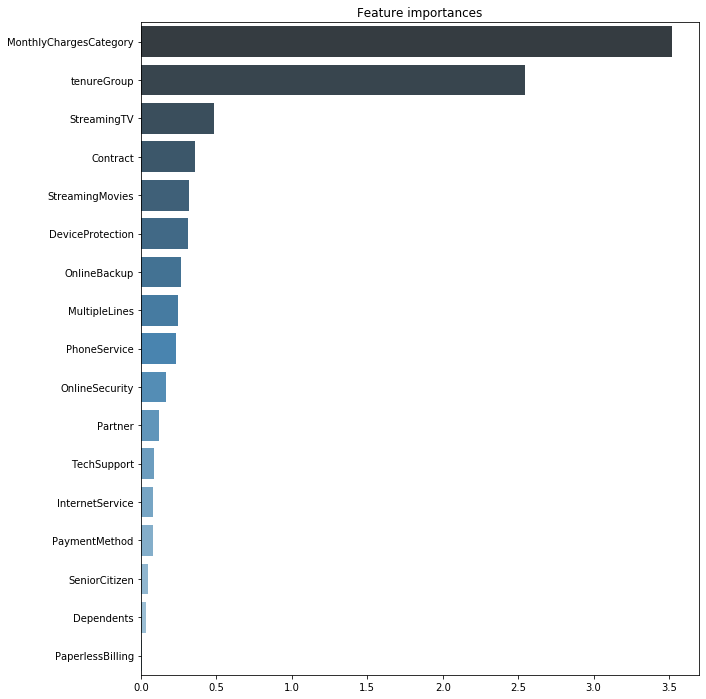

In [113]:
# Regresión logística

imp = pd.Series(data=abs(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importances")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

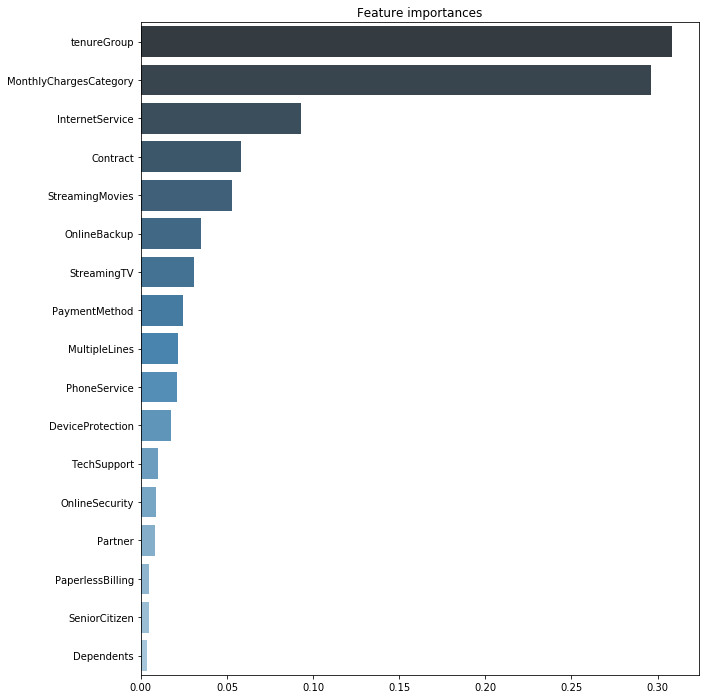

In [114]:
# Bosque Aleatorio

imp = pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importances")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

Con ambos modelos, obtenemos que el *tiempo de permanencia* (tenureGroup) y los *cargos mensuales* (MonthlyChargesCategory) son las variables de mayor relevancia a la hora de clasificar a los Usuarios dentro de los cuatro grupos.